In [7]:
import pandas as pd
import numpy as np
from pathlib import Path
from scipy.optimize import curve_fit
from scipy.special import expit
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# eGFR_path = "Z:\\f.afsari\\4-DUET\database\eGFR Correlation"
eGFR_path = "Z:\\f.afsari\\4-DUET\\database\\eGFR Correlation\\ExcelFiles"

# Load the data
eGFR_data = pd.read_excel(Path(eGFR_path, "eGFR Test Values Structured Version.xlsx"))#, usecols=['Patient_ID', 'eGFR', 'Days', 'Date', 'TX_Date'])

eGFR_data.rename(columns={'Slide Number': 'Patient_ID'}, inplace=True)
eGFR_data.drop(labels=['Slide_Number', 'average'], axis=1, inplace=True)

Patient_IDs = eGFR_data['Patient_ID'].unique()

# # Drop rows with missing values
# eGFR_data.dropna(inplace=True)

# eGFR = eGFR_data['eGFR'].values
# Days = eGFR_data['Days'].values

# # Normalize the data
# eGFR_norm = (eGFR - np.mean(eGFR)) / np.std(eGFR)
# # eGFR_data['eGFR'] = eGFR_norm
# Days_norm = (Days - np.mean(Days)) / np.std(Days)
# # eGFR_data['Days'] = Days_norm

eGFR_data.head()


,Patient_ID,Transplant Date,eGFR Test Date 1,eGFR Score 1,eGFR Test Date 2,eGFR Score 2,eGFR Test Date 3,eGFR Score 3,eGFR Test Date 4,eGFR Score 4,...,eGFR Test Date 22,eGFR Score 22,eGFR Test Date 23,eGFR Score 23,eGFR Test Date 24,eGFR Score 24,eGFR Test Date 25,eGFR Score 25,eGFR Test Date 26,eGFR Score 26
0,10H,2016-04-05 04:38:00,2020-07-09 04:38:00,52.0,2020-07-10 04:50:00,48.0,2020-07-11 05:57:00,49.0,2020-07-11 16:51:00,47.0,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
1,11H,2016-04-05 08:29:00,2018-08-16 08:29:00,60.0,2018-10-16 08:31:00,60.0,2018-12-11 08:21:00,60.0,2019-01-03 09:48:00,60.0,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
2,15H,2016-05-10 08:29:00,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
3,16H,2016-05-05 09:00:00,2018-08-06 09:00:00,46.0,2018-10-04 09:07:00,60.0,2018-10-10 09:30:00,53.0,2018-11-24 15:15:00,39.0,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
4,19H,2016-03-08 09:00:00,2019-03-12 07:20:00,66.0,2019-03-19 06:58:00,72.0,2019-05-10 07:02:00,61.0,2019-08-23 08:05:00,55.0,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN


In [4]:

# Identify columns that contain "eGFR Test Date", "eGFR Score", and "Transplant Date"
combined_columns = [col for col in eGFR_data.columns if any(x in col for x in ["Patient_ID", "eGFR Test Date", "eGFR Score", "Transplant Date"])]
# print(combined_columns)

# Extract combined columns
eGFR_long = eGFR_data[combined_columns]

# Reshape eGFR_long to long format
# Reshape using melt
# melted_df = eGFR_long.melt(var_name='Column', value_name='Value')
# melted_df.head(10)
# eGFR_long = eGFR_long.stack().reset_index(level=1)
# eGFR_long.columns = ['TX_Date','Date', 'eGFR']
# # Reshape using pivot
# pivoted_df = eGFR_long.melt(id_vars='Transplant Date', var_name='Column', value_name='Value').pivot(index='Transplant Date', columns='Column', values='Value').reset_index()
# pivoted_df.head(10)

eGFR_long.head(10)


,Patient_ID,Transplant Date,eGFR Test Date 1,eGFR Score 1,eGFR Test Date 2,eGFR Score 2,eGFR Test Date 3,eGFR Score 3,eGFR Test Date 4,eGFR Score 4,...,eGFR Test Date 22,eGFR Score 22,eGFR Test Date 23,eGFR Score 23,eGFR Test Date 24,eGFR Score 24,eGFR Test Date 25,eGFR Score 25,eGFR Test Date 26,eGFR Score 26
0,10H,2016-04-05 04:38:00,2020-07-09 04:38:00,52.0,2020-07-10 04:50:00,48.0,2020-07-11 05:57:00,49.0,2020-07-11 16:51:00,47.0,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
1,11H,2016-04-05 08:29:00,2018-08-16 08:29:00,60.0,2018-10-16 08:31:00,60.0,2018-12-11 08:21:00,60.0,2019-01-03 09:48:00,60.0,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
2,15H,2016-05-10 08:29:00,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
3,16H,2016-05-05 09:00:00,2018-08-06 09:00:00,46.0,2018-10-04 09:07:00,60.0,2018-10-10 09:30:00,53.0,2018-11-24 15:15:00,39.0,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
4,19H,2016-03-08 09:00:00,2019-03-12 07:20:00,66.0,2019-03-19 06:58:00,72.0,2019-05-10 07:02:00,61.0,2019-08-23 08:05:00,55.0,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
5,20H,2016-05-23 09:00:00,2019-02-14 06:33:00,62.0,2019-02-26 08:59:00,66.0,2019-03-05 06:33:00,52.0,2019-03-19 06:42:00,61.0,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
6,23H,2016-05-31 09:00:00,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
7,24H,2016-05-31 09:00:00,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
8,26H,2016-06-08 09:00:00,2017-08-12 08:07:00,60.0,2017-10-07 08:41:00,60.0,2017-12-09 08:37:00,60.0,2018-02-24 09:15:00,60.0,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN
9,2H,2016-03-25 09:00:00,2019-06-13 10:19:00,77.0,2020-04-20 12:27:00,82.0,2022-02-08 12:58:00,82.0,2022-03-04 12:33:00,77.0,...,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN,NaT,NaN


In [5]:
# eGFR_path = "Z:\\f.afsari\\4-DUET\database\eGFR Correlation"
eGFR_path = "Z:\\f.afsari\\4-DUET\\database\\eGFR Correlation"

# Load the data
eGFR_data = pd.read_csv(Path(eGFR_path, "eGFR_long_data.csv"), usecols=['Patient_ID', 'eGFR', 'Days', 'Date', 'TX_Date'])

Patient_IDs = eGFR_data['Patient_ID'].unique()

# Drop rows with missing values
eGFR_data.dropna(inplace=True)

eGFR = eGFR_data['eGFR'].values
Days = eGFR_data['Days'].values

# Normalize the data
eGFR_norm = (eGFR - np.mean(eGFR)) / np.std(eGFR)
# eGFR_data['eGFR'] = eGFR_norm
Days_norm = (Days - np.mean(Days)) / np.std(Days)
# eGFR_data['Days'] = Days_norm

eGFR_data.head()


,Patient_ID,TX_Date,Date,eGFR,Days
0,10H,4/5/2016,7/9/2020,52,1556
1,10H,4/5/2016,7/10/2020,48,1557
2,10H,4/5/2016,7/11/2020,49,1558
3,10H,4/5/2016,7/11/2020,47,1558
4,10H,4/5/2016,7/12/2020,48,1559


In [6]:
collagen_path = "Z:\\f.afsari\\4-DUET\database\eGFR Correlation\ExcelFiles"

# Load the data
collagen_data = pd.read_excel(Path(collagen_path, "Collagen_Features.xlsx"))
collagen_data.rename(columns={'Slide Number': 'Patient_ID'}, inplace=True)

# Filter collagen data to include only rows with Patient_IDs in the unique_patient_ids
collagen_data = collagen_data[collagen_data['Patient_ID'].isin(Patient_IDs)]

collagen_data.head()


,Patient_ID,Total Patch Area,Tissue Area,Empty Area,Collagen Area,Collagen Area Ratio,Sum Distance Transform,Mean Distance Transform,Max Distance Transform,Standard Deviation Distance Transform,...,Distance Transform Pixel Count > 30,Distance Transform ROI Count > 30,Distance Transform Pixel Count > 35,Distance Transform ROI Count > 35,Distance Transform Pixel Count > 40,Distance Transform ROI Count > 40,Distance Transform Pixel Count > 45,Distance Transform ROI Count > 45,Distance Transform Pixel Count > 50,Distance Transform ROI Count > 50
0,10H,73924608,3873801,70050807,2019526,0.342680,7.911253e+06,3.917381,26.925824,2.860422,...,0,0,0,0,0,0,0,0,0,0
1,11H,62648320,2351219,60297101,1265342,0.349874,5.121517e+06,4.047536,27.459060,3.061986,...,0,0,0,0,0,0,0,0,0,0
3,16H,142184448,5915364,136269084,3418542,0.366250,1.720430e+07,5.032642,36.138622,3.738346,...,229,4,10,1,0,0,0,0,0,0
4,19H,120131584,4321754,115809830,2393923,0.356468,8.321430e+06,3.476064,29.698485,2.621809,...,0,0,0,0,0,0,0,0,0,0
5,20H,196632576,13427937,183204639,6408533,0.323068,2.933234e+07,4.577076,34.132096,3.474107,...,450,6,0,0,0,0,0,0,0,0


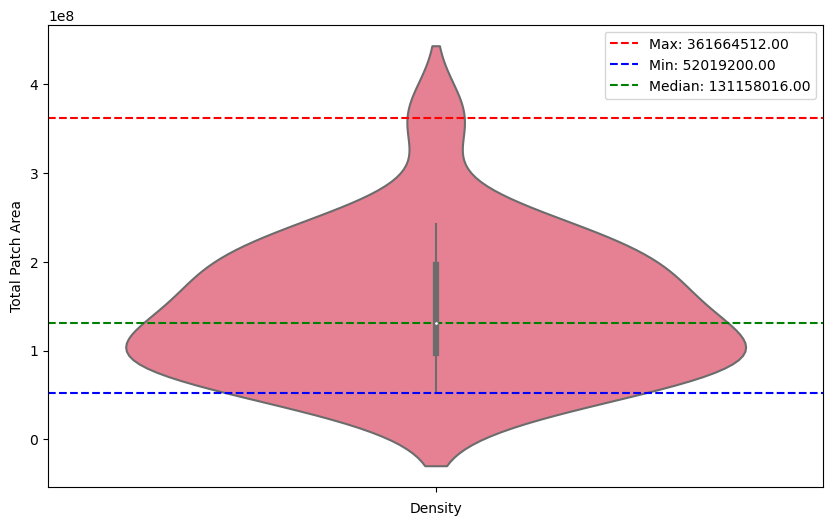

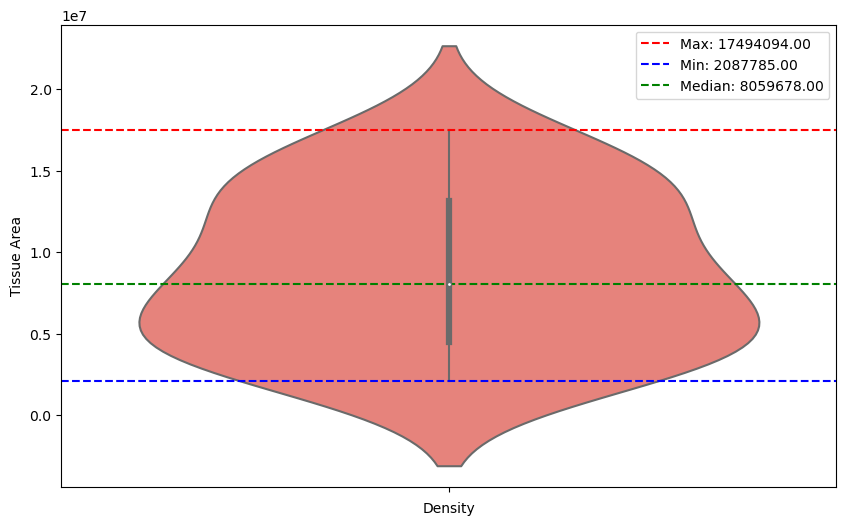

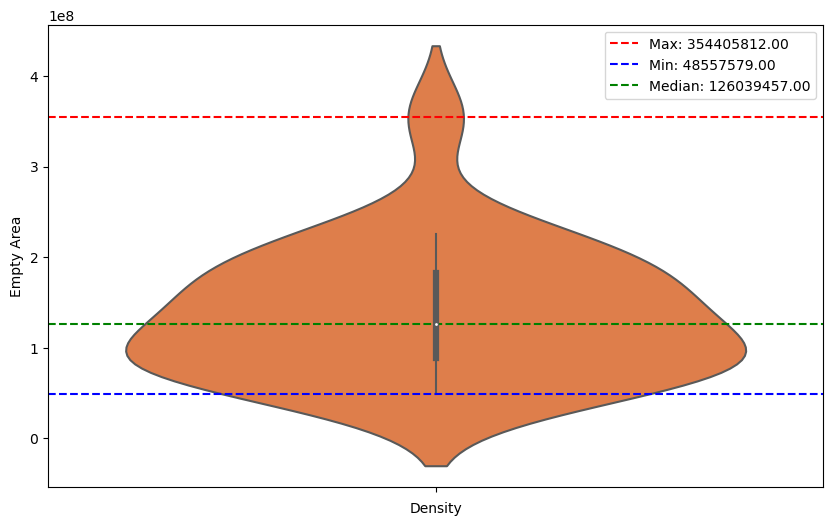

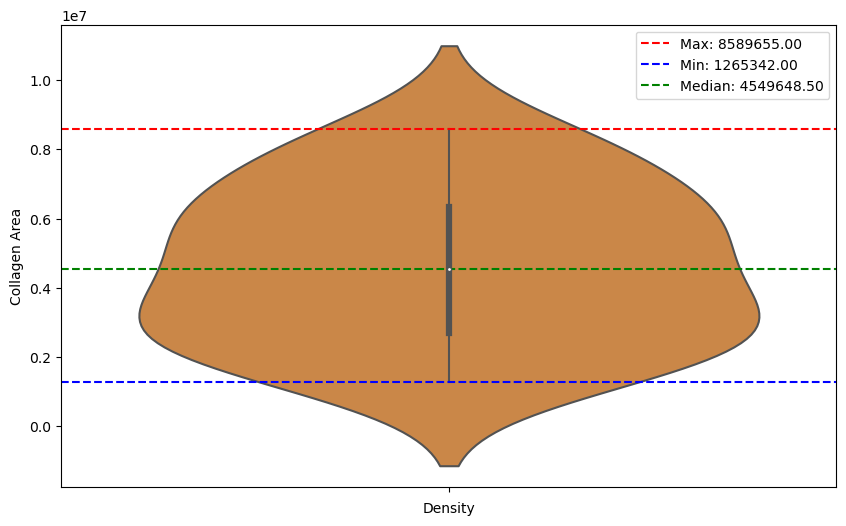

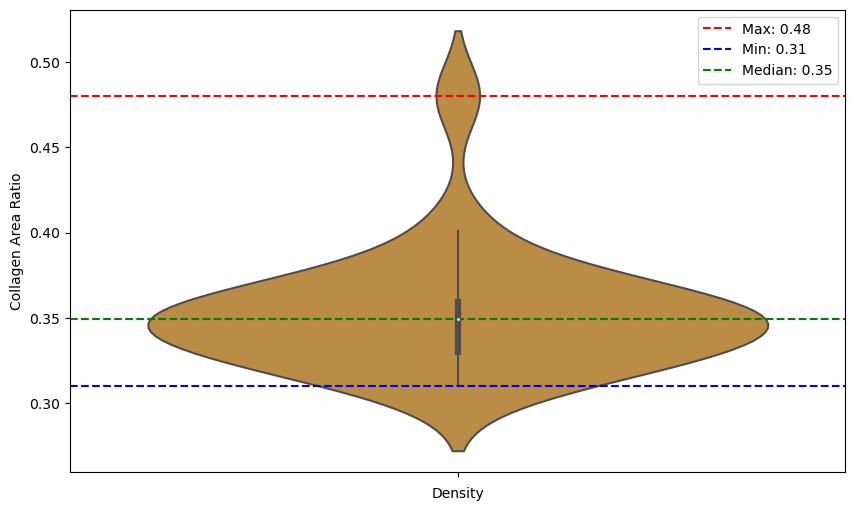

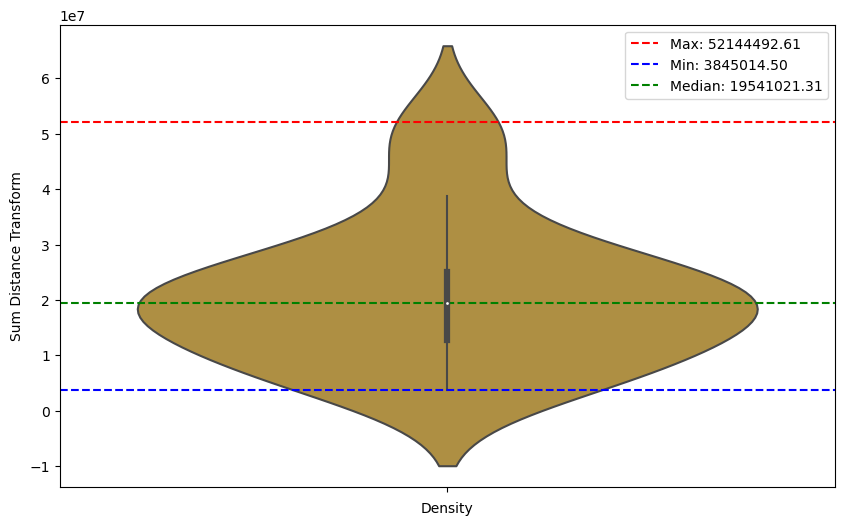

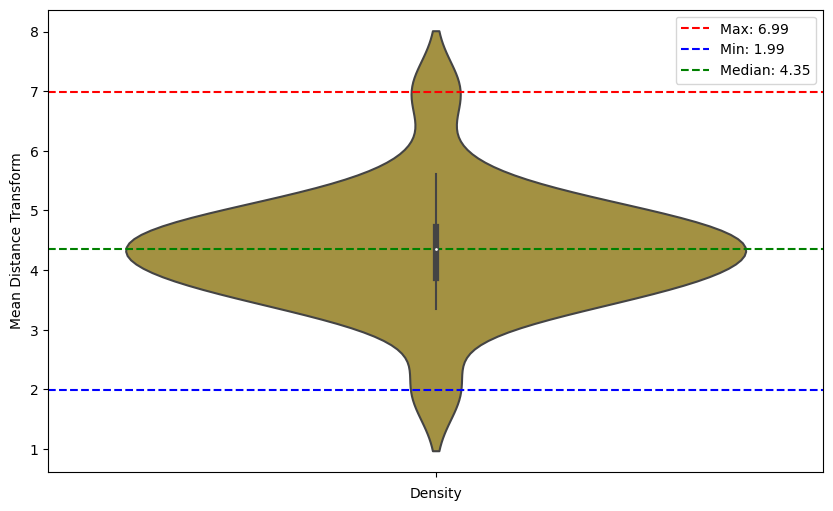

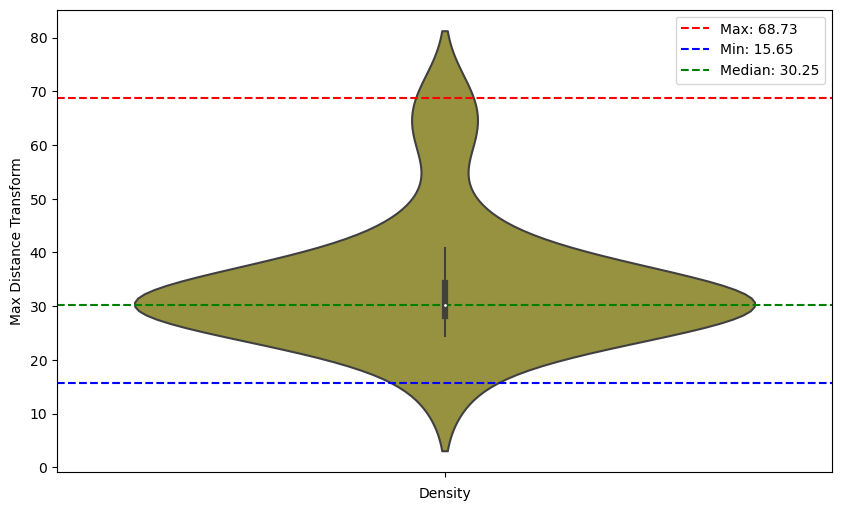

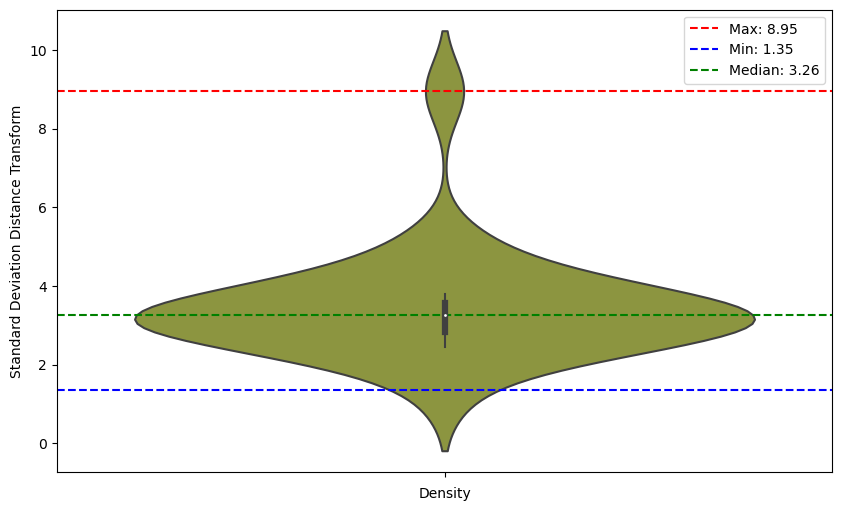

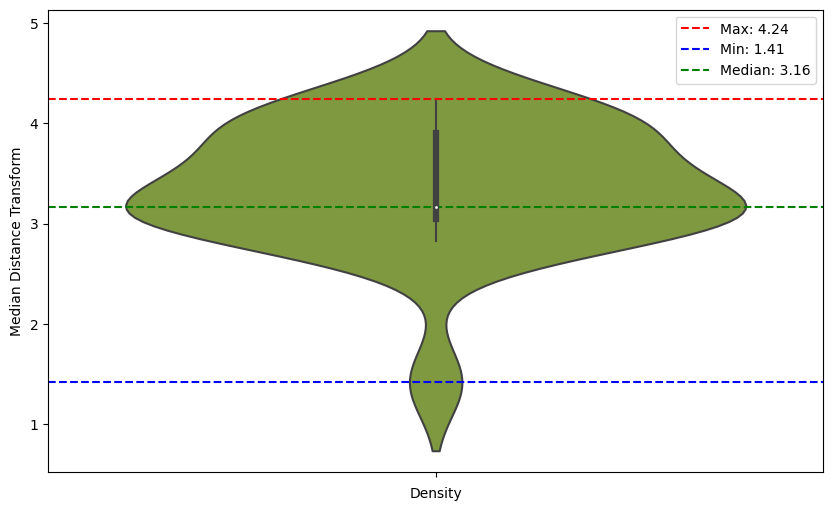

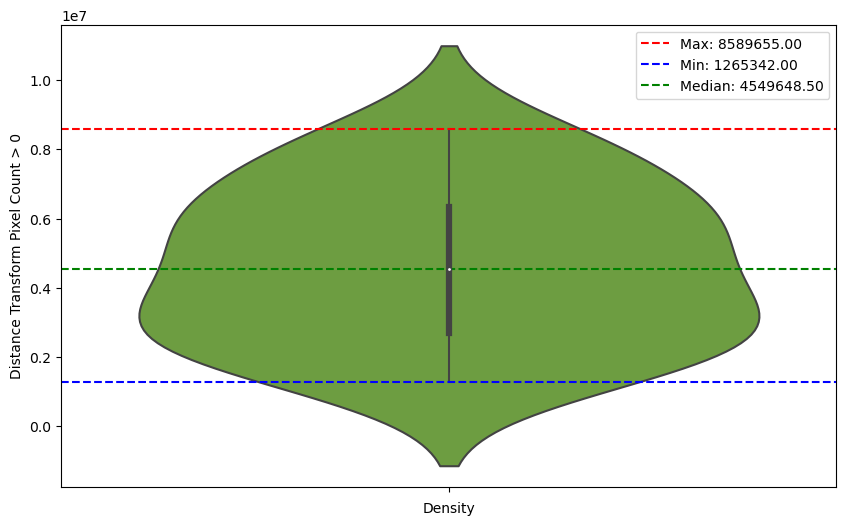

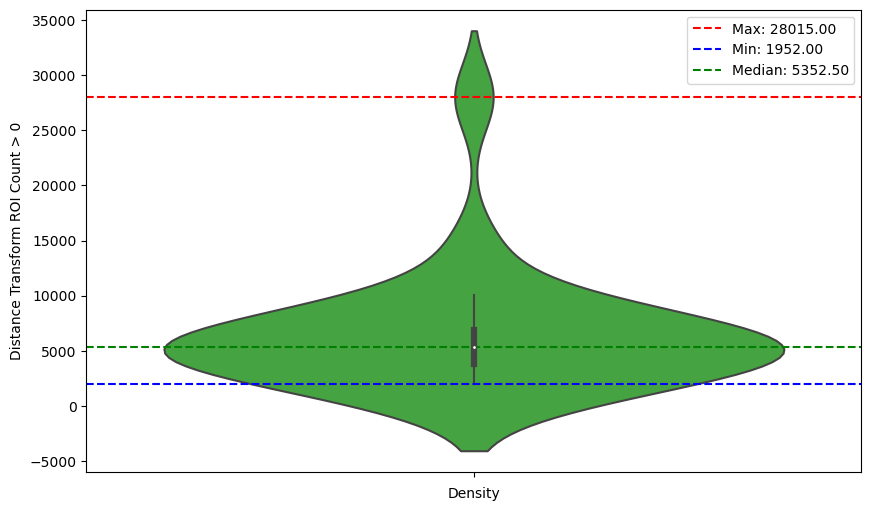

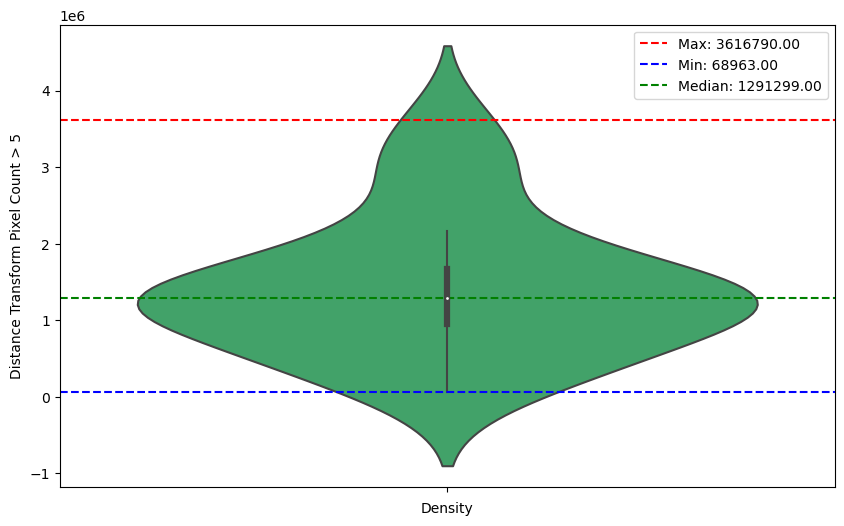

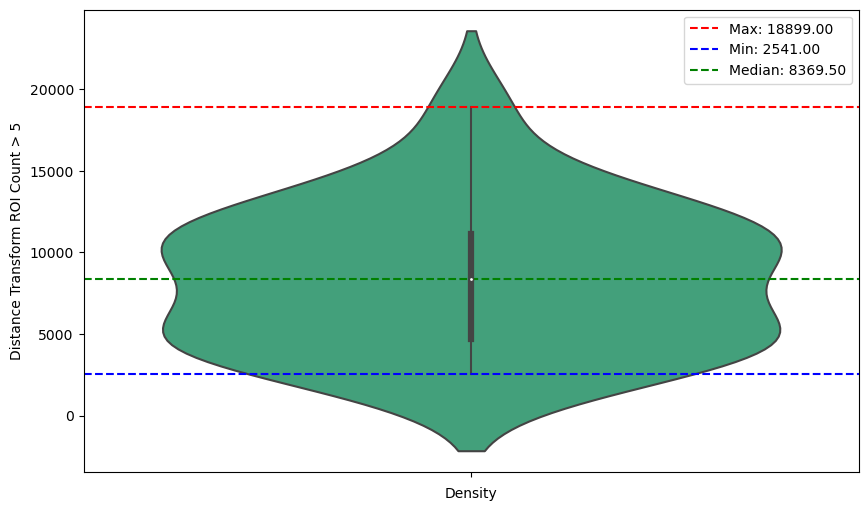

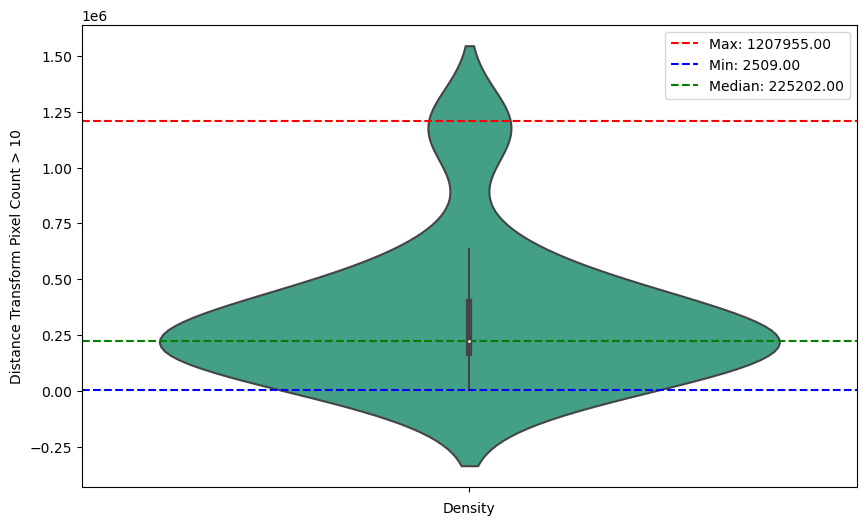

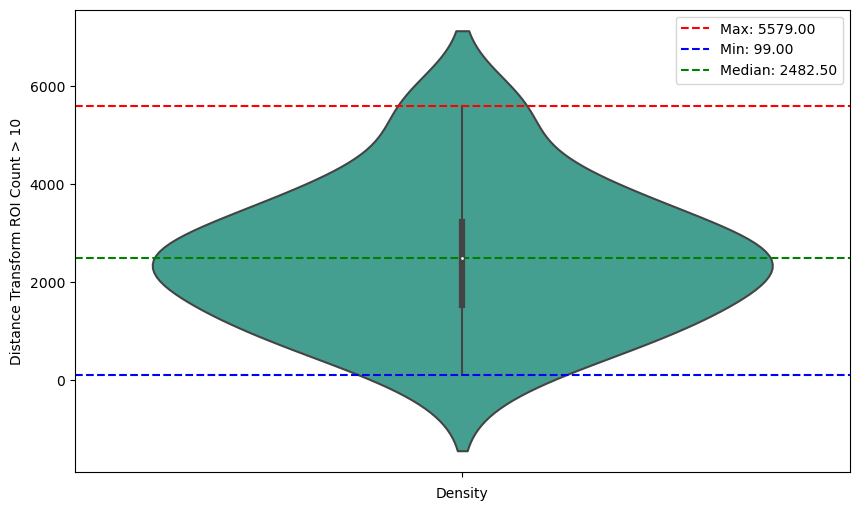

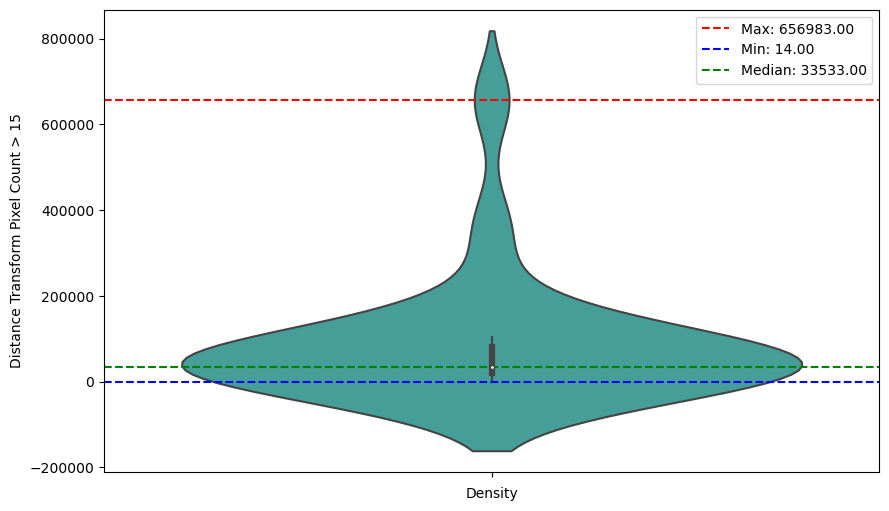

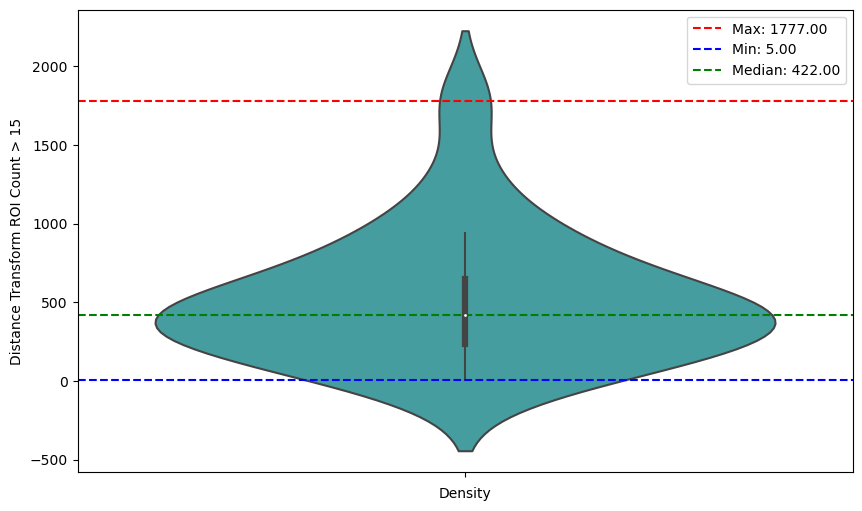

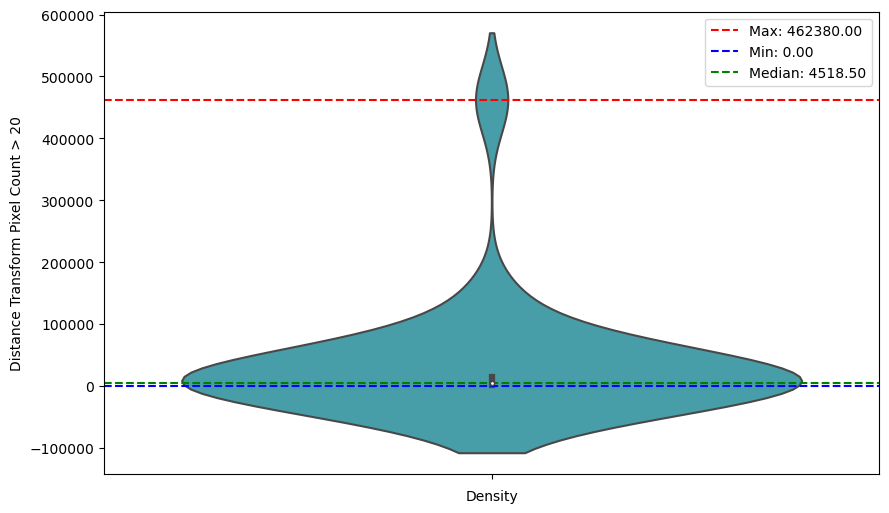

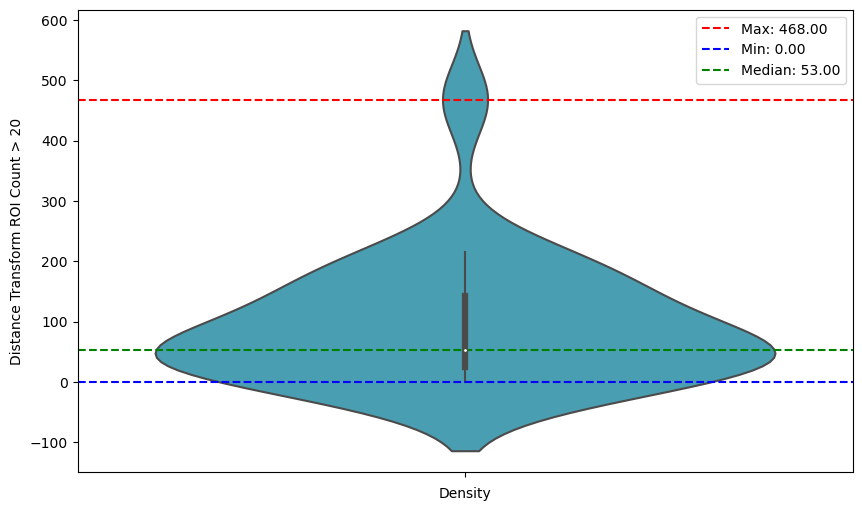

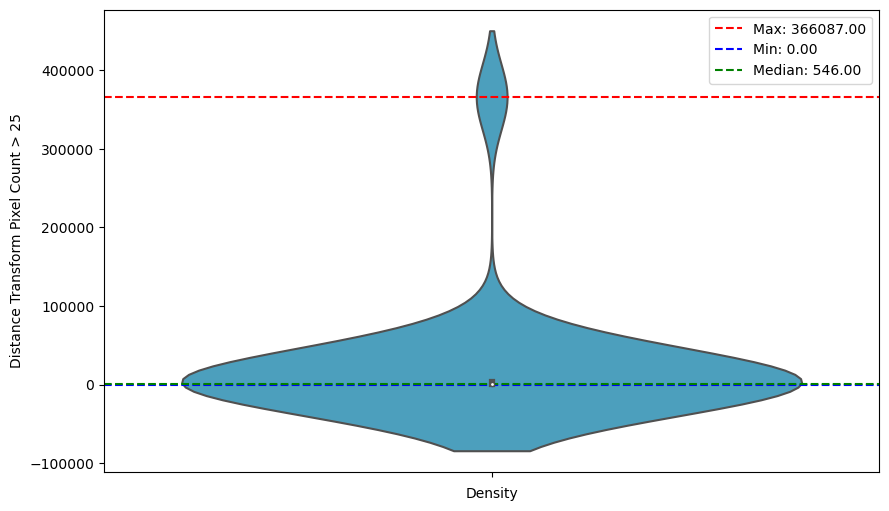

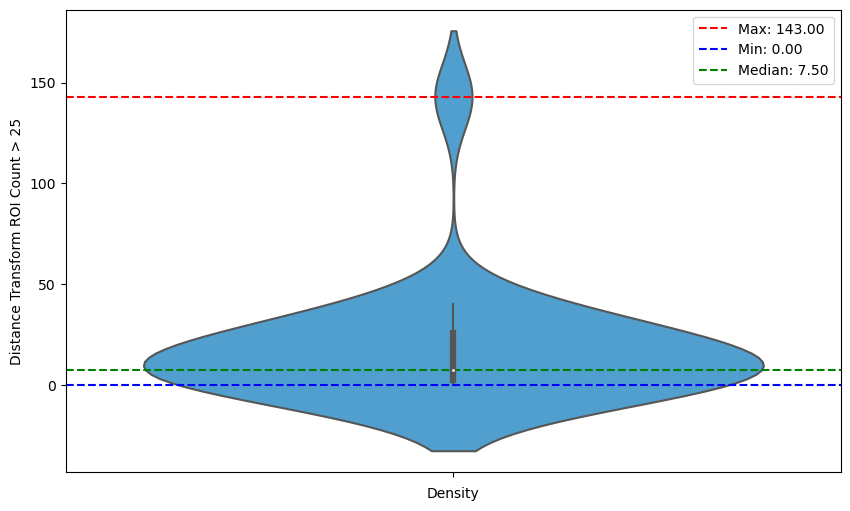

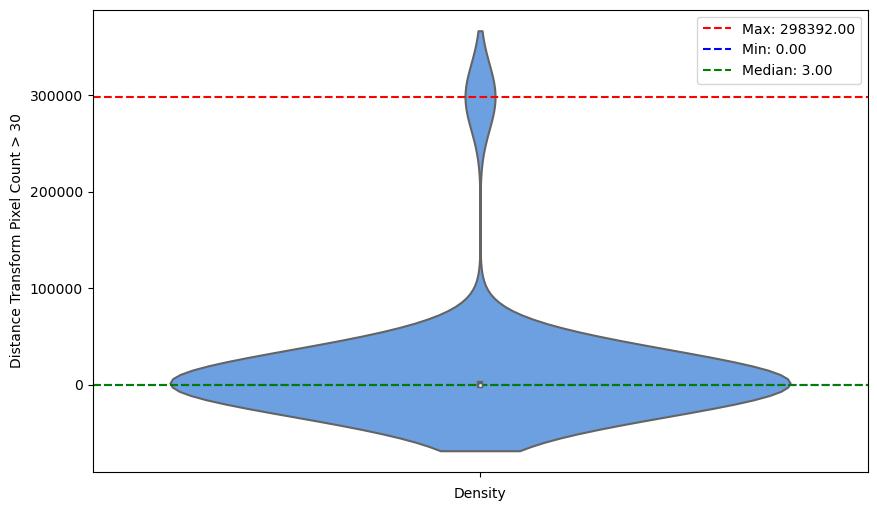

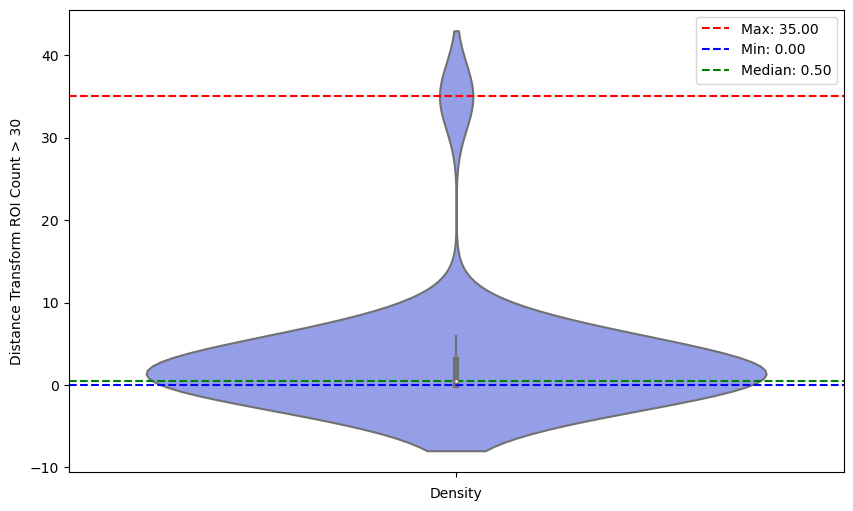

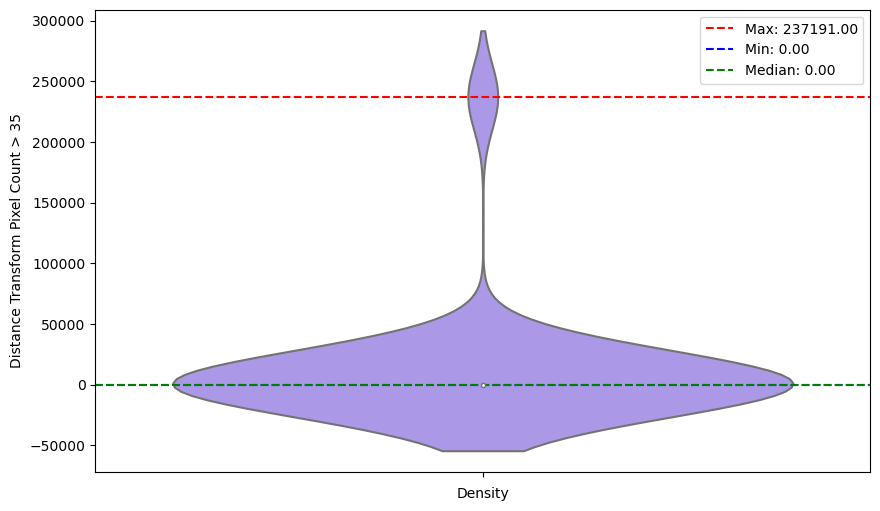

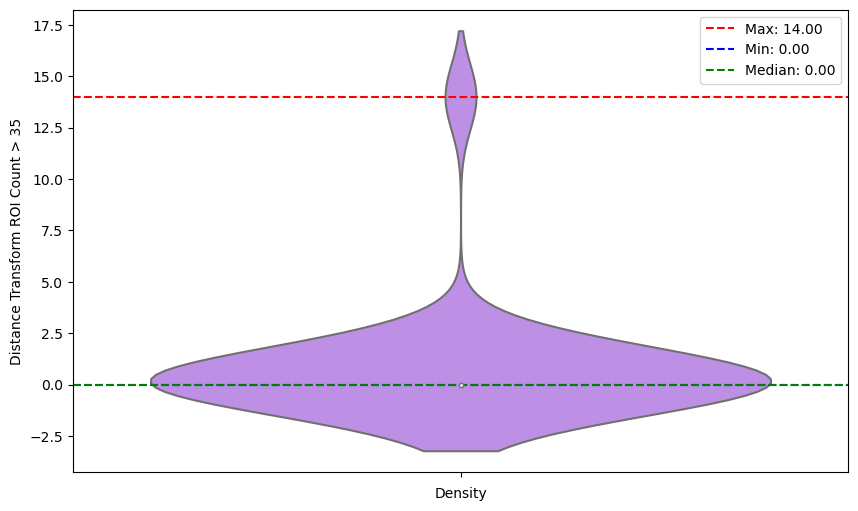

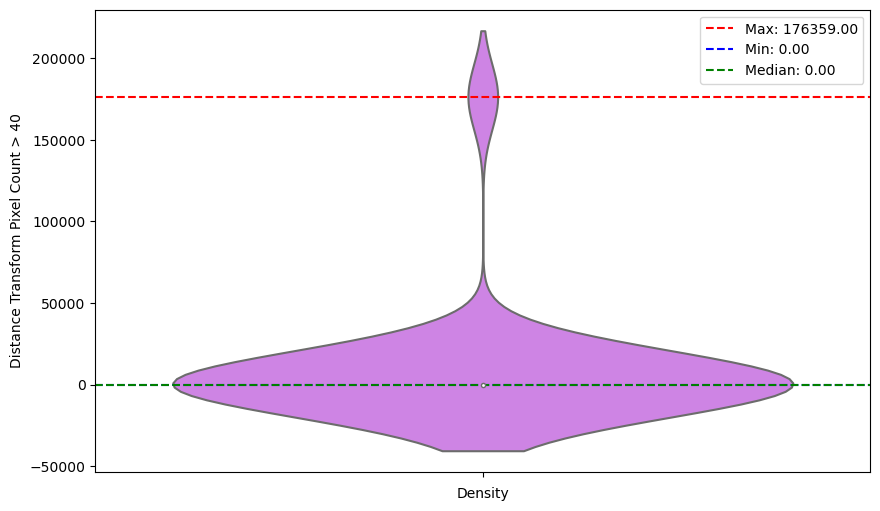

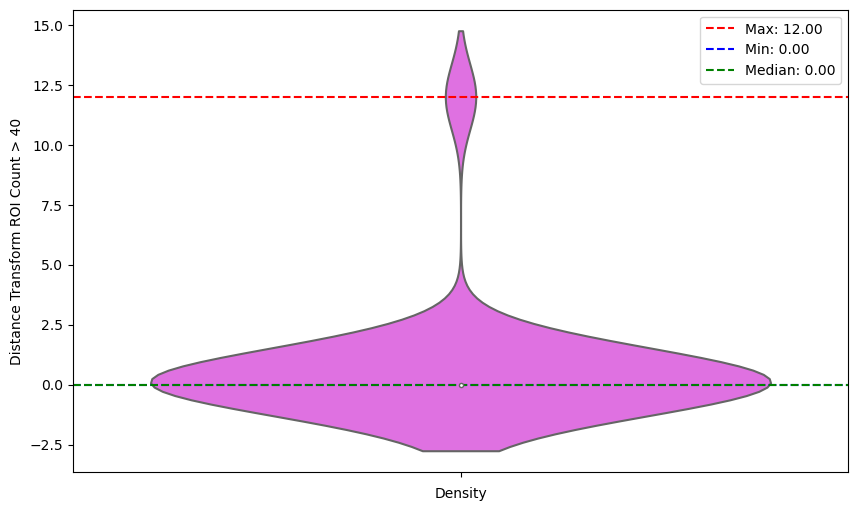

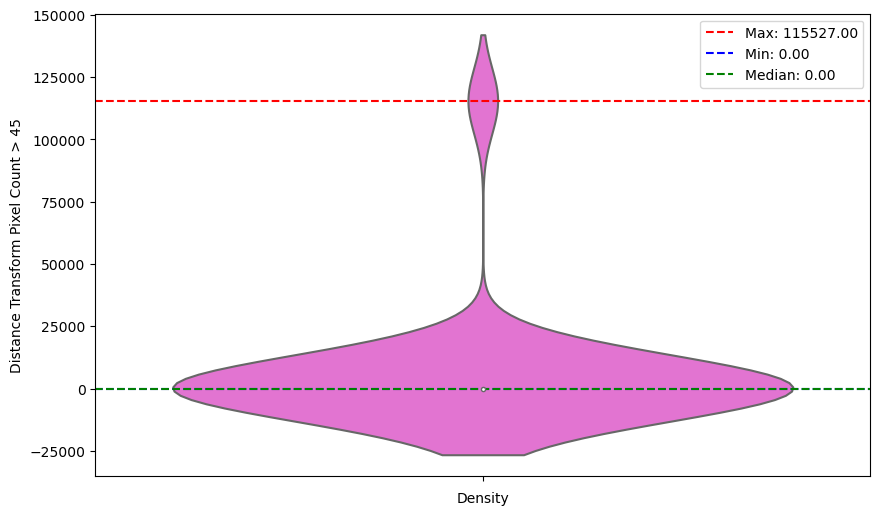

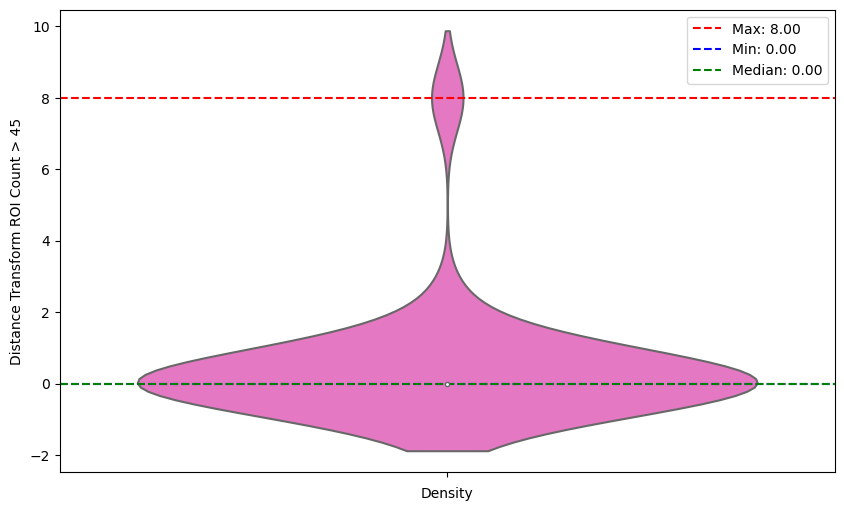

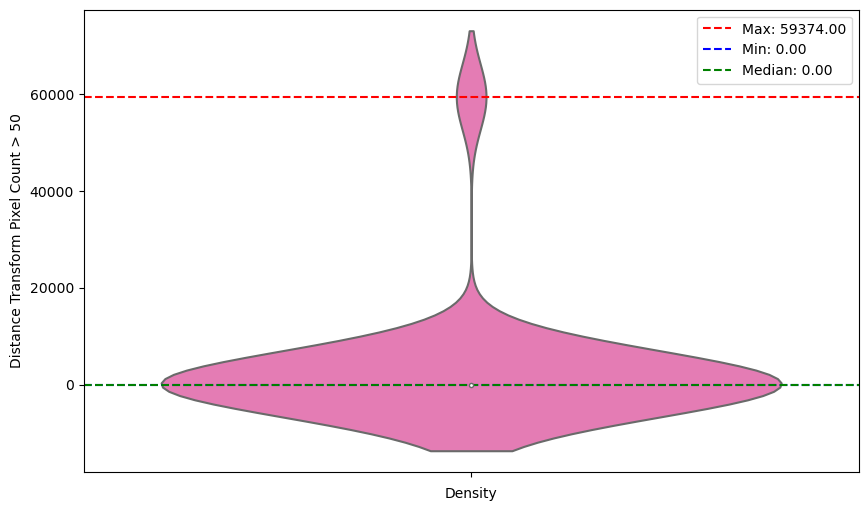

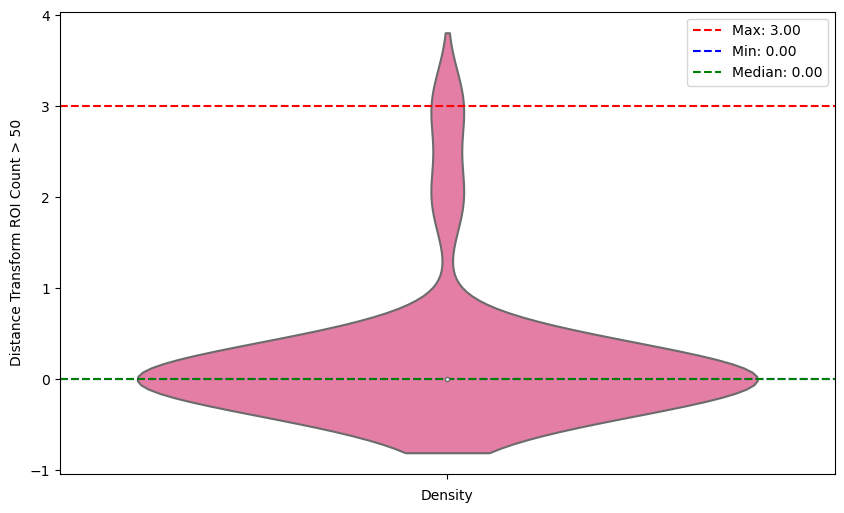

In [14]:
# Reshaping the DataFrame for seaborn
# collagen_data_melted = pd.melt(collagen_data, id_vars=['Patient_ID'], var_name='Feature', value_name='Value')
feature_names = collagen_data.columns[1:].tolist()

# Define a color palette
palette = sns.color_palette("husl", len(feature_names))

for i, feature in enumerate(feature_names):
    
    # Create the violin plot
    plt.figure(figsize=(10,6))    
    
    # sns.violinplot(x='Feature', y='Value', data=collagen_data_melted)
    
    # Create violin plot
    sns.violinplot(y=collagen_data[feature], color=palette[i])
    
    # Calculate metrics
    max_val = collagen_data[feature].max()
    min_val = collagen_data[feature].min()
    median_val = collagen_data[feature].median()
    
    # Add metrics to the plot
    plt.axhline(max_val, color='red', linestyle='--', label=f'Max: {max_val:.2f}')
    plt.axhline(min_val, color='blue', linestyle='--', label=f'Min: {min_val:.2f}')
    plt.axhline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')       
    
    # plt.title(f'Violin Plot of {feature}')
    plt.ylabel(f'{feature}')    
    plt.xlabel('Density')
    plt.legend()
    plt.show()


In [15]:
# Define the model functions
#========================================================================#
# 1. Linear Model: eGFR = intercept + slope.Days
#========================================================================#
def linear_model(Days, beta0, beta1):
    return beta0 + beta1 * Days

#========================================================================#
# 2. Polynomial Model: eGFR = beta_2_poly.Days^2 + beta_1_poly.Days + beta_0_poly
#========================================================================#
def polynomial_model(Days, beta0, beta1, beta2):
    return beta0 + beta1 * Days + beta2 * Days**2

#========================================================================#
# 3. Exponential Model: eGFR = a.exp(b.Days)
#========================================================================#
def exponential_model(Days, beta0, beta1):
    return beta0 * np.exp(beta1 * Days)

#========================================================================#
# 4. Piecewise Linear Model:
#========================================================================#
def piecewise_linear_model(Days, beta0, beta1, beta2, B):
    return np.piecewise(Days, [Days <= B, Days > B], 
                        [lambda Days: beta0 + beta1 * Days, 
                         lambda Days: beta0 + beta1 * Days + beta2 * (Days - B)])

#========================================================================#
# 5. Logistic Growth Model: eGFR_i(Days) = Asym \cdot \left( \frac{1}{1 + \exp \left( \frac{xmid - Days}{scal}\right)} \right)
#========================================================================#
def logistic_growth_model(Days, Asym, xmid, scal):
    return Asym * expit((xmid - Days) / scal)

#========================================================================#
#  6. Power Model: eGFR ~ \beta_0 * Days^\beta_1
#========================================================================#
def power_model(Days, beta0, beta1):
    return beta0 * Days**beta1

#========================================================================#
# 7. Simple eGFR average
#========================================================================#

#========================================================================#
# 8. Average the fitted linear models using two consecutive points
#========================================================================#


In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Create directory if it doesn't exist
output_dir = "Z:\\f.afsari\\4-DUET\\database\\eGFR Correlation\\plots"
Path(output_dir).mkdir(parents=True, exist_ok=True)

results = []

# Fit models to the data
for patient in Patient_IDs:
    
    # Skip patient 46H (only one measurement)
    if patient == '46H':
        continue
    
    patient_eGFR_data = eGFR_data[eGFR_data['Patient_ID'] == patient]
    patient_collagen_data = collagen_data[collagen_data['Patient_ID'] == patient]
    
    Days_patient = patient_eGFR_data['Days'].values
    eGFR_patient = patient_eGFR_data['eGFR'].values
    
    # Initialize dictionary to store the parameters
    patient_results = {'Patient_ID': patient}      
    
    # Plot initialization
    plt.figure(figsize=(10, 6))
    plt.scatter(Days_patient, eGFR_patient, label='Data', color='black')
    
    # Linear model
    try:
        popt_linear, _ = curve_fit(linear_model, Days_patient, eGFR_patient)
        patient_results.update({'Linear_beta0': popt_linear[0], 'Linear_beta1': popt_linear[1]})
        plt.plot(Days_patient, linear_model(Days_patient, *popt_linear), label='Linear Model')
    except RuntimeError:
        patient_results.update({'Linear_beta0': np.nan, 'Linear_beta1': np.nan})

    # Polynomial model
    try:
        popt_poly, _ = curve_fit(polynomial_model, Days_patient, eGFR_patient)
        patient_results.update({'Poly_beta0': popt_poly[0], 'Poly_beta1': popt_poly[1], 'Poly_beta2': popt_poly[2]})
        plt.plot(Days_patient, polynomial_model(Days_patient, *popt_poly), label='Polynomial Model')
    except RuntimeError:
        patient_results.update({'Poly_beta0': np.nan, 'Poly_beta1': np.nan, 'Poly_beta2': np.nan})

    # Exponential model
    try:
        popt_exp, _ = curve_fit(exponential_model, Days_patient, eGFR_patient)
        patient_results.update({'Exp_beta0': popt_exp[0], 'Exp_beta1': popt_exp[1]})
        plt.plot(Days_patient, exponential_model(Days_patient, *popt_exp), label='Exponential Model')
    except RuntimeError:
        patient_results.update({'Exp_beta0': np.nan, 'Exp_beta1': np.nan})
    
    # Piecewise Linear model    
    try:
        B = np.median(Days_patient)
        popt_piecewise, _ = curve_fit(lambda Days, beta0, beta1, beta2: piecewise_linear_model(Days, beta0, beta1, beta2, B), Days_patient, eGFR_patient)
        patient_results.update({'Piecewise_beta0': popt_piecewise[0], 'Piecewise_beta1': popt_piecewise[1], 'Piecewise_beta2': popt_piecewise[2], 'Piecewise_B': B})
        plt.plot(Days_patient, piecewise_linear_model(Days_patient, *popt_piecewise, B), label='Piecewise Linear Model')
    except RuntimeError:
        patient_results.update({'Piecewise_beta0': np.nan, 'Piecewise_beta1': np.nan, 'Piecewise_beta2': np.nan, 'Piecewise_B': B})
    
    # Logistic Growth model
    xmid = np.median(Days_patient)
    scal = 1.0  # Initial guess
    try:
        popt_logistic, _ = curve_fit(logistic_growth_model, Days_patient, eGFR_patient, p0=[max(eGFR_patient), xmid, scal])
        patient_results.update({'Logistic_Asym': popt_logistic[0], 'Logistic_xmid': popt_logistic[1], 'Logistic_scal': popt_logistic[2]})
        plt.plot(Days_patient, logistic_growth_model(Days_patient, *popt_logistic), label='Logistic Growth Model')
    except RuntimeError:
        patient_results.update({'Logistic_Asym': np.nan, 'Logistic_xmid': np.nan, 'Logistic_scal': np.nan})

    # Power model
    try:
        popt_power, _ = curve_fit(power_model, Days_patient, eGFR_patient)
        patient_results.update({'Power_beta0': popt_power[0], 'Power_beta1': popt_power[1]})
        plt.plot(Days_patient, power_model(Days_patient, *popt_power), label='Power Model')
    except RuntimeError:
        patient_results.update({'Power_beta0': np.nan, 'Power_beta1': np.nan})
    
    # Ordinary least squares model
    try:
        ols_model = sm.OLS(eGFR_patient, sm.add_constant(Days_patient))
        ols_results = ols_model.fit()
        patient_results.update({'OLS_beta0': ols_results.params[0], 'OLS_beta1': ols_results.params[1]})
        plt.plot(Days_patient, ols_results.fittedvalues, label='OLS Model')
    except RuntimeError:
        patient_results.update({'OLS_beta0': np.nan, 'OLS_beta1': np.nan})   

    # Customize and save plot
    plt.title(f'Patient {patient}')
    plt.xlabel('Days')
    plt.ylabel('eGFR')
    plt.legend()
    plt.grid(True)
    plt.savefig(Path(output_dir, f'{patient}_curve.png'))
    plt.close()
    
    # Append the results to the list
    results.append(patient_results)

# Convert results to a DataFrame
results_df = pd.DataFrame(results)
# results_df.head()


C:\Users\f.afsari\AppData\Local\Temp\ipykernel_1940\3908785020.py:18: RuntimeWarning: overflow encountered in exp
  return beta0 * np.exp(beta1 * Days)
c:\Users\f.afsari\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
c:\Users\f.afsari\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:966: RuntimeWarning: overflow encountered in square
  cost = np.sum(infodict['fvec'] ** 2)
c:\Users\f.afsari\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:1004: RuntimeWarning: invalid value encountered in multiply
  pcov = pcov * s_sq


In [8]:
avg_eGFR = eGFR_data.groupby('Patient_ID')['eGFR'].mean()
avg_eGFR.drop(labels='46H', inplace=True)
# print(len(avg_eGFR))
# print(avg_eGFR)
results_df['Avg_eGFR'] = avg_eGFR.to_list()
results_df.head()


,Patient_ID,Linear_beta0,Linear_beta1,Poly_beta0,Poly_beta1,Poly_beta2,Exp_beta0,Exp_beta1,Piecewise_beta0,Piecewise_beta1,Piecewise_beta2,Piecewise_B,Logistic_Asym,Logistic_xmid,Logistic_scal,Power_beta0,Power_beta1,Avg_eGFR
0,10H,-1043.556452,7.016129e-01,2.435203e+06,-3.125637e+03,1.002975e+00,NaN,NaN,3586.250000,-2.271739e+00,4.608696e+00,1558.0,49.857143,2766.216304,1.081557e+01,NaN,NaN,49.857143
1,11H,60.000000,-2.180256e-12,6.000000e+01,7.654988e-12,-2.014906e-13,NaN,NaN,60.000000,-2.176703e-12,-2.186251e-12,1030.0,60.000000,10031.850580,3.873386e+02,6.000000e+01,-5.640183e-09,60.000000
2,16H,63.065397,-1.439082e-02,-1.788590e+03,4.182890e+00,-2.372677e-03,NaN,NaN,-72.132262,1.441031e-01,-3.215809e-01,888.0,100.400573,1038.597391,-1.261506e+07,1.991413e+02,-2.028168e-01,50.200000
3,19H,153.363733,-7.742689e-02,7.929501e+02,-1.158498e+00,4.549751e-04,NaN,NaN,216.227942,-1.337385e-01,8.107327e-02,1158.0,69.000000,1159.472222,7.247212e-01,2.744001e+06,-1.513506e+00,62.000000
4,20H,35.807473,2.428429e-02,1.487722e+03,-2.696385e+00,1.270525e-03,NaN,NaN,396.301192,-3.331474e-01,3.874402e-01,1016.0,NaN,NaN,NaN,3.320148e+00,4.192017e-01,61.000000


In [9]:
# Merge results with collagen data
merged_data = pd.merge(collagen_data, results_df, on='Patient_ID', how='left')
merged_data.drop(columns=['Patient_ID'], inplace=True)

# Calculate and print the correlation matrix for the merged data
corr_matrix = merged_data.corr()
print(corr_matrix)

# Get the columns in results_df
results_columns = results_df.columns.tolist()
results_columns.remove('Patient_ID')  # Remove 'Patient_ID' if it exists in results_df


                                       Total Patch Area  Tissue Area  \
Total Patch Area                               1.000000     0.570184   
Tissue Area                                    0.570184     1.000000   
Empty Area                                     0.998546     0.525063   
Collagen Area                                  0.588742     0.987100   
Collagen Area Ratio                           -0.184564    -0.596797   
Sum Distance Transform                         0.483227     0.925716   
Mean Distance Transform                        0.043775     0.443993   
Max Distance Transform                         0.209745     0.551106   
Standard Deviation Distance Transform          0.033298     0.412265   
Median Distance Transform                      0.071061     0.434393   
Distance Transform Pixel Count > 0             0.588742     0.987100   
Distance Transform ROI Count > 0               0.241273     0.011079   
Distance Transform Pixel Count > 5             0.479811     0.90

In [10]:
# Filter the correlation matrix
filtered_corr_matrix = corr_matrix.loc[results_columns, ~corr_matrix.columns.isin(results_columns)]

filtered_corr_matrix.dropna(inplace=True)

filtered_corr_matrix.head()


,Total Patch Area,Tissue Area,Empty Area,Collagen Area,Collagen Area Ratio,Sum Distance Transform,Mean Distance Transform,Max Distance Transform,Standard Deviation Distance Transform,Median Distance Transform,...,Distance Transform Pixel Count > 30,Distance Transform ROI Count > 30,Distance Transform Pixel Count > 35,Distance Transform ROI Count > 35,Distance Transform Pixel Count > 40,Distance Transform ROI Count > 40,Distance Transform Pixel Count > 45,Distance Transform ROI Count > 45,Distance Transform Pixel Count > 50,Distance Transform ROI Count > 50
Linear_beta0,0.226899,0.248832,0.218760,0.284669,0.038213,0.232620,0.083306,0.119999,0.047220,0.112654,...,-0.013519,0.109538,-0.016590,0.073489,-0.017921,0.071785,-0.018528,0.076519,-0.017891,0.019561
Linear_beta1,-0.232762,-0.220537,-0.226718,-0.262869,-0.090268,-0.188456,-0.013547,-0.052748,0.023847,-0.061172,...,0.064506,-0.071537,0.065857,-0.041422,0.066712,-0.041480,0.067071,-0.037291,0.066658,0.034619
Poly_beta0,-0.224968,-0.231762,-0.217891,-0.260965,-0.066623,-0.229204,-0.104393,-0.140427,-0.102949,-0.077218,...,-0.057341,-0.101041,-0.054135,-0.067976,-0.053103,-0.062622,-0.052637,-0.067432,-0.053096,-0.070748
Poly_beta1,0.224999,0.231685,0.217928,0.260945,0.066731,0.229072,0.104261,0.140311,0.102750,0.077241,...,0.057122,0.100957,0.053920,0.067933,0.052889,0.062550,0.052423,0.067361,0.052882,0.070542
Poly_beta2,-0.225091,-0.231565,-0.218032,-0.260923,-0.066917,-0.228846,-0.103996,-0.140077,-0.102382,-0.077230,...,-0.056739,-0.100804,-0.053543,-0.067841,-0.052513,-0.062408,-0.052048,-0.067213,-0.052506,-0.070172


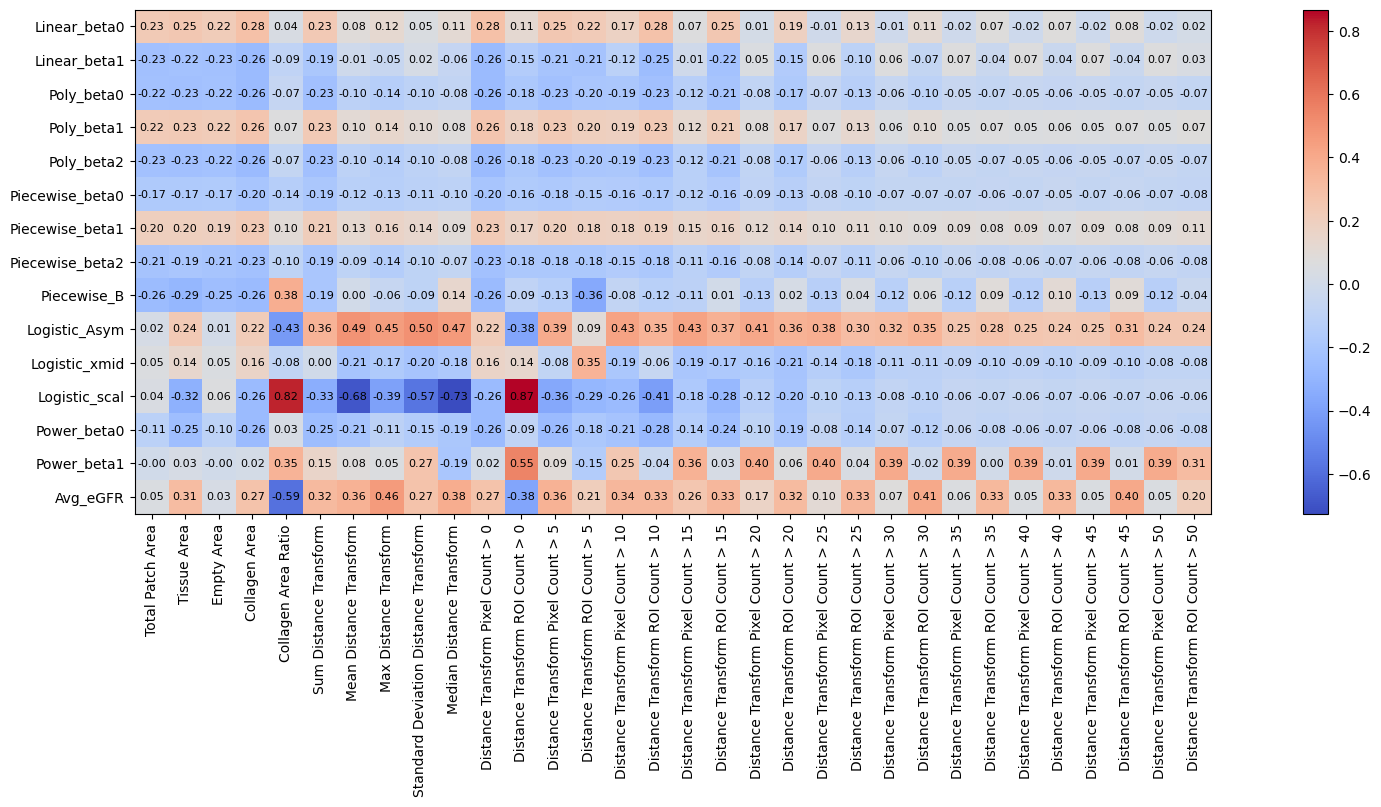

In [11]:
# Visualize the correlation matrix
plt.figure(figsize=(20, 8))  # Adjust width and height as needed

plt.imshow(filtered_corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()  # Add colorbar for visualization

# Customize xticks and yticks
plt.xticks(np.linspace(0, len(filtered_corr_matrix.columns)-1, len(filtered_corr_matrix.columns)),
           filtered_corr_matrix.columns, rotation=90, fontsize=10)
plt.yticks(np.arange(len(filtered_corr_matrix.index)), filtered_corr_matrix.index, fontsize=10)

# # Example usage with annotate
# plt.annotate('Label', xy=(-0.5, 0), xytext=(20, 20), xycoords='data', textcoords='offset points',
#              fontsize=10, ha='center', va='bottom',
#              bbox=dict(boxstyle='square', fc='white', color='k'),
#              arrowprops=dict(arrowstyle='-[, widthB=5.0, lengthB=1.0', lw=1.5, color='k'))

# Loop over data dimensions and create text annotations (optional)
for i in range(len(filtered_corr_matrix.index)):
    for j in range(len(filtered_corr_matrix.columns)):
        plt.text(j, i, f'{filtered_corr_matrix.iloc[i, j]:.2f}', ha='center', va='center', color='black', fontsize=8)

plt.tight_layout()  # Ensure labels are not cut off

plt.show()
